## 1D cruise track plots

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
### dm1d = pd.read_parquet("../models/anoms_sea_1d/val_predictions.pq")
#dm_largeseas =  pd.read_parquet("../models/anoms_sea_large/val_predictions.pq")
#dm_meanstd =  pd.read_parquet("../models/mean_std/val_predictions.pq")
dm_1d = pd.read_parquet("../models/anoms_sea_1d/selection_imputed.pq")
#AG5 = pd.read_parquet("../models/anoms_sea_1d/val_predictions_imputed_AG5.pq")
#dm_1d_noshift = pd.read_parquet("../models/anoms_sea_1d/val_predictions_imputed_noshifts.pq")
#dm_1d = dm_1d.reset_index("expocode", drop=False)
#AG5 = AG5.reset_index("expocode", drop=False)
#dm_1d_noshift = dm_1d_noshift.reset_index("expocode", drop=False)
mlp = pd.read_parquet("../models/sota_anoms64/test_predictions.pq")
#mlp = mlp[mlp.expocode=="AG5W20141113"]
#mlp = pd.read_parquet("../models/sota_anoms/val_predictions.pq")

In [20]:
dm_1d.index

MultiIndex([('33RO20180307', 2032830),
            ('33RO20180307', 2032831),
            ('33RO20180307', 2032832),
            ('33RO20180307', 2032833),
            ('33RO20180307', 2032834),
            ('33RO20180307', 2032835),
            ('33RO20180307', 2032836),
            ('33RO20180307', 2032837),
            ('33RO20180307', 2032838),
            ('33RO20180307', 2032839),
            ...
            ('AG5W20170115', 4532284),
            ('AG5W20170115', 4532285),
            ('AG5W20170115', 4532286),
            ('AG5W20170115', 4532287),
            ('AG5W20170115', 4532288),
            ('AG5W20170115', 4532289),
            ('AG5W20170115', 4532290),
            ('AG5W20170115', 4532291),
            ('AG5W20170115', 4532292),
            ('AG5W20170115', 4532293)],
           names=['expocode', 'index'], length=9995)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_cruises(
    ax,
    truth,
    cruises,
    labels,
    consts=None,
    *,
    xlabel="distance (5km)",
    ylabel=r"$fCO_2$ ($\mu$atm)",
    title=None,
    label_fontsize=12,
    label_fontweight="normal",   # e.g. "bold"
    title_fontsize=14,
    title_fontweight="bold",
    tick_fontsize=10,
    xtick_step=64,
    fill_alpha=0.6,
    linewidth=2,
    legend=True,
    # NaN highlighting
    highlight_nans=False,
    nan_where="means",            # "truth", "means", or "both"
    nan_color="red",
    nan_alpha=0.6,
    nan_linewidth=1.5,
):
    """
    Plot truth and per-cruise mean ± c*std bands.
    Line and fill share colour; x-ticks rotated 45°; label/title sizing configurable.
    Optionally highlight NaN positions with vertical red lines.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
    truth : 1D array-like
    cruises : iterable of 2D arrays (shape: [T, ensemble_members])
    labels : iterable of str
    consts : iterable of float, optional
        Multiplier(s) for the std band (defaults to 1 for each cruise).
    highlight_nans : bool
        If True, draws vertical lines at x where data are NaN.
    nan_where : {"truth", "means", "both"}
        Which series to inspect for NaNs.
    """
    if consts is None:
        consts = [1] * len(cruises)

    # Truth line
    truth = np.asarray(truth, dtype=float)
    truth_line, = ax.plot(truth, linewidth=linewidth, label="true")

    nan_x = set()

    # Cruises: mean ± c*std
    for label, cruise, c in zip(labels, cruises, consts):
        cruise = np.asarray(cruise, dtype=float)
        mean = cruise.mean(axis=1)
        std  = cruise.std(axis=1)
        x = np.arange(cruise.shape[0])

        line, = ax.plot(
            mean,
            "--",
            label=label,
            linewidth=linewidth,
            markersize=5,
        )
        colour = line.get_color()
        ax.fill_between(
            x,
            mean - c * std,
            mean + c * std,
            alpha=fill_alpha,
            facecolor=colour,
            edgecolor="none",
        )

        if highlight_nans and nan_where in ("means", "both"):
            nan_x.update(x[np.isnan(mean)])

    if highlight_nans and nan_where in ("truth", "both"):
        nan_x.update(np.where(np.isnan(truth))[0])

    # Draw vertical NaN markers spanning the full axes height
    if highlight_nans and nan_x:
        for x0 in sorted(nan_x):
            ax.axvline(x=x0, color=nan_color, alpha=nan_alpha, linewidth=nan_linewidth)

    # Axes cosmetics
    ax.grid(True, axis="x")
    ax.set_xlabel(xlabel, fontsize=label_fontsize, fontweight=label_fontweight)
    ax.set_ylabel(ylabel, fontsize=label_fontsize, fontweight=label_fontweight)
    if title is not None:
        ax.set_title(title, fontsize=title_fontsize, fontweight=title_fontweight)

    # X ticks and rotation
    if len(truth) > 0:
        ax.set_xticks(range(0, len(truth), xtick_step))
    ax.tick_params(axis="x", labelrotation=45)
    ax.tick_params(axis="both", which="major", labelsize=tick_fontsize)

    if legend:
        ax.legend()

        
def plot_sample(ax, cruise, title):
    ax.set_title(title)
    ax.plot(cruise[:, :2])
    ax.grid(True, axis="x")
    ax.set_xlabel("distance (5km)")
    ax.set_xticks(range(0, mean.size, 64))
    ax.set_ylabel(r"$fCO_2$($\mu$atm)")
    
def get_values(dfs, sample_names, expocode):
    xco2 = mlp.xco2.loc[mlp.expocode == expocode].values[:, None]
    fco2 = mlp.fco2rec_uatm.loc[mlp.expocode == expocode].values + xco2[:, 0]
    for (df, sname) in zip(dfs, sample_names):
        print(np.isnan(df.loc[df.expocode == expocode, sname].values).sum())
    return fco2, [df.loc[df.expocode == expocode, sname].values for (df, sname) in zip(dfs, sample_names)]

0
0


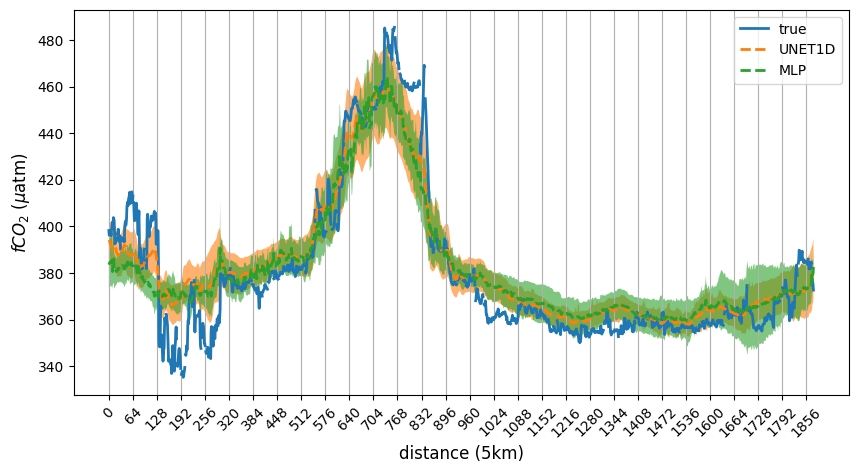

In [24]:
expocodes = mlp.expocode.unique()
expocode ="AG5W20170115" #"49P120080116"
#print((mlp.expocode == "58US20181201").sum())
fig, ax = plt.subplots(figsize=(10, 5))
dm_samples = [f'rec_{i}' for i in range(1000)]
mlp_samples = [f'mlp_{i}' for i in range(20)]
fco2, cruises = get_values([ dm_1d, mlp], [dm_samples,]*1+[mlp_samples], expocode)#[dm_largeseas[dm_samples].values, dm_meanstd[dm_samples].values, dm_1d[dm_samples].values, mlp[mlp_samples].values]
plot_cruises(ax, fco2, cruises , [ 'UNET1D', 'MLP'], consts=[1, 5, 1], highlight_nans=True)
plt.legend()
plt.show()

## MLP Stats

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from scipy.stats import pearsonr
import numpy as np
def get_df_err_stats(df, sample_cols):
    seamask = df.seamask.astype(bool)
    fco2_nans = ~df.fco2rec_uatm.isna()
    pred_nans = ~df.mlp_0.isna()
    mask = seamask & fco2_nans & pred_nans
    
    truth = df.loc[mask, "fco2rec_uatm"].values
    mean = df.loc[mask, sample_cols].mean(axis=1).values
    
    low = df.loc[mask, sample_cols].min(axis=1).values
    high = df.loc[mask, sample_cols].max(axis=1).values
    coverage = (truth >= low) & (truth <= high)
    
    rmse = root_mean_squared_error(truth, mean)
    r2 = r2_score(truth, mean)
    mae = mean_absolute_error(truth, mean)
    bias = (truth - mean).mean()
    
    # S: (n_rows, n_samp) samples from your model. Replace df.values with your samples.
    S = df.loc[mask, sample_cols].values            # shape (n_rows, 50) in your real case
    y = truth                # shape (n_rows,)

    levels = np.arange(0.1, 1.0, 0.1)  # 10%,...,90% central coverage

    q_lo = np.quantile(S, (1 - levels)/2, axis=1).T   # shape (n_rows, len(levels))
    q_hi = np.quantile(S, 1 - (1 - levels)/2, axis=1).T

    covered = ((y[:, None] >= q_lo) & (y[:, None] <= q_hi)).mean(axis=0)  # empirical coverage
    cal_dict = {f"{int(100*l)}%": c for l, c in zip(levels, covered)}
    
    # E|S - y|
    term1 = np.mean(np.abs(S - y[:, None]), axis=1)
    # 0.5 * E|S - S'|
    term2 = 0.5 * np.mean(np.abs(S[:, None, :] - S[:, :, None]), axis=(1,2))
    crps = term1 - term2                      # one score per row (lower is better)
    crps_mean = crps.mean()

    return dict({
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'bias': bias,
        'coverage': coverage.mean(),
        'samples_std': df.loc[mask, sample_cols].std(axis=1).mean(),
        'avg_interval_width': (high-low).mean(),
        'avg_interval_width_std': (high-low).std(),
        'max_interval_width': (high-low).max(),
        'r2_interval_width_error': r2_score((truth-mean)**2, df.loc[mask, sample_cols].var(axis=1)),
        'corr_variance_error': pearsonr((truth-mean)**2, df.loc[mask, sample_cols].var(axis=1))[0],
        'ratio_error_interval_width': (mae/(high-low)).mean(),
        'calibration': cal_dict,
        'crps': crps_mean
    })

In [17]:
import pandas as pd
test_preds = pd.read_parquet("../models/anoms_sea_1d/eta_0_test_samples.pq")
test_mlp = pd.read_parquet("../models/sota_anoms64_big/test_predictions.pq")
pred_mask = pd.read_parquet("../models/anoms_sea_1d/pred_nans.pq")

In [18]:
pred_mask.head()

,0
0,False
1,False
2,False
3,False
4,False


In [19]:
test_preds['co2_clim8d'].head()

0   -58.137474
1   -56.674156
2   -56.674156
3   -56.674156
4   -56.674156
Name: co2_clim8d, dtype: float32

In [20]:
test_preds.fco2rec_uatm.head()

0    344.883606
1    338.870941
2    317.581055
3    303.302032
4    304.997925
Name: fco2rec_uatm, dtype: float64

In [21]:
np.allclose(test_mlp.fco2rec_uatm.values, test_preds.fco2rec_uatm.values, equal_nan=True)

True

In [5]:
test_mlp.head()

,index,expocode,window_id,time_1d,lat,lon,sal,sst_deg_c,pppp_hpa,woa_sss,...,mlp_40,mlp_41,mlp_42,mlp_43,mlp_44,mlp_45,mlp_46,mlp_47,mlp_48,mlp_49
316,316,069920190503,0,2019-05-04,47.643352,-3.976877,33.874794,12.760501,NaN,35.0,...,346.556671,340.158844,342.534393,346.253815,344.041809,340.021271,340.484894,340.518829,342.409882,340.843536
317,317,069920190503,1,2019-05-04,47.643556,-4.045207,34.060921,12.566983,NaN,35.0,...,348.806458,344.553711,345.877838,347.910156,348.568756,343.356934,341.004974,346.355927,349.839294,343.593964
318,318,069920190503,2,2019-05-04,47.653791,-4.108304,34.134563,12.737556,NaN,35.0,...,349.449829,345.263763,346.660370,348.366028,349.947144,344.945587,341.993958,347.124329,350.328674,345.543213
319,319,069920190503,3,2019-05-04,47.663978,-4.172930,34.108986,12.845666,NaN,35.0,...,349.079254,344.756500,346.153381,348.035400,348.978912,343.914032,341.412048,346.611145,349.984131,344.735321
320,320,069920190503,4,2019-05-04,47.671709,-4.239331,34.235008,12.808307,NaN,35.0,...,348.586395,344.361847,345.709198,347.756805,348.377930,343.022064,340.856384,346.175446,349.599945,342.912262


In [14]:
mlp_sample_cols = [f"mlp_{i}" for i in range(50)]
get_df_err_stats(test_mlp.iloc[pred_mask.values], mlp_sample_cols)
#get_df_err_stats(test_mlp, mlp_sample_cols)

{'rmse': 18.06346842167456,
 'mae': 11.13212442357682,
 'r2': 0.8052833547925657,
 'bias': 1.5007128395894829,
 'coverage': 0.3564053655070149,
 'samples_std': 2.409771,
 'avg_interval_width': 10.972075,
 'avg_interval_width_std': 6.6915135,
 'max_interval_width': 180.74576,
 'r2_interval_width_error': -0.04017844771254109,
 'corr_variance_error': 0.3391488374068653,
 'ratio_error_interval_width': 1.2380344,
 'calibration': {'10%': 0.020489161403022444,
  '20%': 0.04076931707928797,
  '30%': 0.06143448330484255,
  '40%': 0.08389489872022493,
  '50%': 0.10779195349952589,
  '60%': 0.13332145300781242,
  '70%': 0.1632268724163042,
  '80%': 0.19976107345341262,
  '90%': 0.2507056693353398},
 'crps': 9.984164728324528}

## Videos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def animate_surface_samples(
        df: pd.DataFrame,
        grid_shape: tuple[int, int] | None = None,
        *,
        mode: str = "mean",          # "mean" or "sample"
        sample_id: str = "sample_0", # used only if mode == "sample"
        interval: int = 200,         # ms between frames
        cmap=None,                   # matplotlib colormap or None
        save_as: str | None = None,  # e.g. "movie.gif" or "movie.mp4"
        writer: str = "pillow",      # "pillow" for GIF, "ffmpeg" for MP4
        # --- colourbar options ---
        cbar: bool = True,
        cbar_label: str | None = None,
        cbar_fraction: float = 0.046,
        cbar_pad: float = 0.04,
        box: tuple[int, int, int, int] | None = None# to pick image subset
    ):
    """
    Animate daily surface estimates stored in a DataFrame, with optional colourbar.
    """
    if mode not in {"mean", "sample"}:
        raise ValueError("mode must be 'mean' or 'sample'")

    # Deduce grid shape if possible
    if grid_shape is None:
        if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
            ys, xs = (df.index.get_level_values(i).unique() for i in (0, 1))
            grid_shape = (len(ys), len(xs))
        else:
            raise ValueError("grid_shape must be provided when index "
                             "is not a 2-level MultiIndex")

    # extract seamask and remove column
    seamask = df["seamask"].values.reshape(grid_shape)
    df = df.drop(columns=["seamask"], level=0)

    # Collapse or slice the sample dimension
    if mode == "mean":
        daily = df.groupby(level=0, axis=1).mean()
    else:
        daily = df.xs(sample_id, level=1, axis=1)

    dates = daily.columns
    if box is not None:
        y_min, x_min, y_max, x_max = box
        cube = np.stack([daily[date].values.reshape(grid_shape)[y_min:y_max, x_min:x_max][:, ::-1] for date in dates])
        seamask = seamask[y_min:y_max, x_min:x_max][:, ::-1]
    else:
        cube = np.stack([daily[date].values.reshape(grid_shape)[:, ::-1] for date in dates])
        seamask = seamask[:, ::-1]

    # robust colour limits
    vmin, vmax = np.percentile(cube, [2, 95])

    fig, ax = plt.subplots()
    im = ax.imshow(cube[0], origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)
    title = ax.set_title(str(dates[0]))

    # --- colourbar ---
    if cbar:
        cb = fig.colorbar(im, ax=ax, fraction=cbar_fraction, pad=cbar_pad)
        if cbar_label:
            cb.set_label(cbar_label)

    def update(frame):
        # mask land each frame (does not alter other frames)
        slice_ = cube[frame].copy()
        slice_[~seamask] = np.nan
        im.set_array(slice_)
        title.set_text(str(dates[frame]))
        return im, title

    ani = FuncAnimation(fig, update, frames=len(dates),
                        interval=interval, blit=True)

    if save_as is not None:
        ani.save(save_as, writer=writer)

    return ani


mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-nzfx0ric because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [9]:
import pandas as pd
series_name = "papagayo_mask"
df = pd.read_parquet(f"../models/anoms_sea_1d/{series_name}.pq")
df = df.reset_index("patch_pix")

In [10]:
df

,,patch_pix,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,seamask
,,,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,...,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,
lat,lon,,,,,,,,,,,,,,,,,,,,,
0.037302,270.000000,8126464,424.280426,405.763062,409.967010,400.541290,417.633026,401.502045,406.844482,371.467834,413.040375,...,379.907043,399.926392,389.498749,404.110321,384.402496,409.631042,431.433716,408.801727,402.955627,True
0.074604,269.956055,8126466,399.741730,402.597351,422.670837,411.027802,395.948090,343.853027,361.164276,403.271576,411.106506,...,403.984161,405.190247,406.092194,403.051819,412.264587,401.101135,394.764252,384.798401,390.176544,True
0.111906,269.912109,8126472,422.249695,419.290833,423.267853,412.588745,407.913605,394.595093,405.952301,397.448547,395.326172,...,399.730499,391.115356,397.047760,391.398376,403.647247,394.981384,421.200592,403.449158,394.838501,True
0.149208,269.868164,8126474,397.323242,384.149384,395.910889,431.940460,413.361755,426.309052,398.994934,391.340363,390.815948,...,398.803101,396.484894,416.593018,398.071960,396.291595,403.411682,415.120789,405.339630,407.882050,True
0.186510,269.824219,8126496,413.614136,396.263031,408.529694,419.706116,403.819580,396.597473,390.308350,397.096283,399.207367,...,386.835907,396.996338,398.480286,385.339783,394.232849,401.123840,414.524078,398.063416,408.243652,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.560574,270.175781,8388575,405.618195,406.827606,406.021576,421.974518,423.618683,412.493927,400.477844,398.401550,442.771973,...,432.120239,450.203796,420.190216,409.563538,392.287598,380.448486,384.166870,402.156982,394.430664,False
41.610443,270.131836,8388597,397.268982,412.097412,422.714355,444.638275,397.938934,393.899109,380.229980,392.673340,402.615540,...,393.979340,434.429718,420.634583,405.841980,402.186432,396.988525,395.017853,401.813629,412.248077,False


In [11]:
df.columns

MultiIndex([( 'patch_pix',         ''),
            ('2022-01-01', 'sample_0'),
            ('2022-01-02', 'sample_0'),
            ('2022-01-03', 'sample_0'),
            ('2022-01-04', 'sample_0'),
            ('2022-01-05', 'sample_0'),
            ('2022-01-06', 'sample_0'),
            ('2022-01-07', 'sample_0'),
            ('2022-01-08', 'sample_0'),
            ('2022-01-09', 'sample_0'),
            ('2022-01-10', 'sample_0'),
            ('2022-01-11', 'sample_0'),
            ('2022-01-12', 'sample_0'),
            ('2022-01-13', 'sample_0'),
            ('2022-01-14', 'sample_0'),
            ('2022-01-15', 'sample_0'),
            ('2022-01-16', 'sample_0'),
            ('2022-01-17', 'sample_0'),
            ('2022-01-18', 'sample_0'),
            ('2022-01-19', 'sample_0'),
            ('2022-01-20', 'sample_0'),
            ('2022-01-21', 'sample_0'),
            ('2022-01-22', 'sample_0'),
            ('2022-01-23', 'sample_0'),
            ('2022-01-24', 'sample_0'),


In [12]:
df = df.drop(columns=["patch_pix"], level=0)

In [13]:
df

,,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,...,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,seamask
,,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,...,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,sample_0,
lat,lon,,,,,,,,,,,,,,,,,,,,,
0.037302,270.000000,424.280426,405.763062,409.967010,400.541290,417.633026,401.502045,406.844482,371.467834,413.040375,403.593964,...,379.907043,399.926392,389.498749,404.110321,384.402496,409.631042,431.433716,408.801727,402.955627,True
0.074604,269.956055,399.741730,402.597351,422.670837,411.027802,395.948090,343.853027,361.164276,403.271576,411.106506,399.849182,...,403.984161,405.190247,406.092194,403.051819,412.264587,401.101135,394.764252,384.798401,390.176544,True
0.111906,269.912109,422.249695,419.290833,423.267853,412.588745,407.913605,394.595093,405.952301,397.448547,395.326172,405.625854,...,399.730499,391.115356,397.047760,391.398376,403.647247,394.981384,421.200592,403.449158,394.838501,True
0.149208,269.868164,397.323242,384.149384,395.910889,431.940460,413.361755,426.309052,398.994934,391.340363,390.815948,404.387543,...,398.803101,396.484894,416.593018,398.071960,396.291595,403.411682,415.120789,405.339630,407.882050,True
0.186510,269.824219,413.614136,396.263031,408.529694,419.706116,403.819580,396.597473,390.308350,397.096283,399.207367,407.001251,...,386.835907,396.996338,398.480286,385.339783,394.232849,401.123840,414.524078,398.063416,408.243652,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.560574,270.175781,405.618195,406.827606,406.021576,421.974518,423.618683,412.493927,400.477844,398.401550,442.771973,440.982819,...,432.120239,450.203796,420.190216,409.563538,392.287598,380.448486,384.166870,402.156982,394.430664,False
41.610443,270.131836,397.268982,412.097412,422.714355,444.638275,397.938934,393.899109,380.229980,392.673340,402.615540,430.770630,...,393.979340,434.429718,420.634583,405.841980,402.186432,396.988525,395.017853,401.813629,412.248077,False


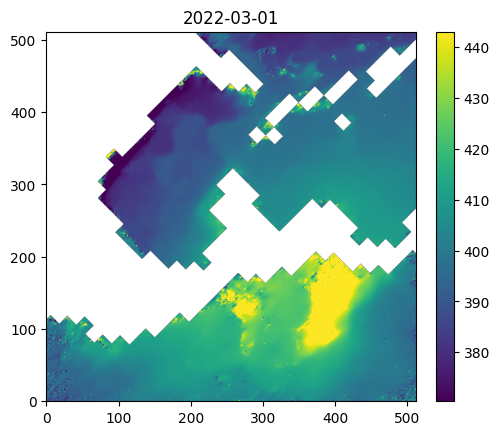

In [14]:
ny = 2**9
nx = 2**9
ani = animate_surface_samples(
        df,
        grid_shape=(ny, nx),   # supply if not inferable
        mode="sample",           # or "sample"
        interval=150,
        save_as=f"../models/anoms_sea_1d/{series_name}.gif"  # requires Pillow; use ".mp4" with ffmpeg
    )

## Time Series Stats

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_surface_stat(
    df: pd.DataFrame,
    grid_shape: tuple[int, int] | None = None,
    *,
    stat: str = "mean",                 # "mean" or "std"
    seamask_col: str = "seamask",       # 1=ocean, 0=land
    ddof: int = 0,                      # used when stat=="std"
    box: tuple[int,int,int,int] | None = None,  # (y0,y1,x0,x1)
    flip_lr: bool = True,
    # colourmap / limits
    cmap_mean = "RdYlBu_r",
    cmap_std  = "RdBu_r",
    robust: bool = True,
    robust_percentiles = (2, 98),
    vmin: float | None = None,
    vmax: float | None = None,
    # layout / typography
    figsize = (6, 5),
    title_size: int = 14,
    title_weight: str = "bold",
    tick_size: int = 10,
    tick_weight: str = "normal",
    cbar_label: str | None = None,      # if None, set automatically
    cbar_label_size: int = 12,
    cbar_label_weight: str = "bold",
    remove_axis_labels: bool = True,
    remove_ticks: bool = False,
):
    """
    df.columns must be a MultiIndex (date, sample_id). df[seamask_col] is required on the row index grid.
    stat="mean": mean over samples per day, then mean over days.
    stat="std" : std over samples per day, then mean of those stds over days.
    """
    if stat not in {"mean", "std"}:
        raise ValueError("stat must be 'mean' or 'std'")

    # Deduce grid shape if needed
    if grid_shape is None:
        if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
            ys, xs = (df.index.get_level_values(i).unique() for i in (0, 1))
            grid_shape = (len(ys), len(xs))
        else:
            raise ValueError("grid_shape must be provided when index is not a 2-level MultiIndex")
    ny, nx = grid_shape

    # Seamask
    if seamask_col not in df.columns:
        raise ValueError(f"Expected a '{seamask_col}' column in df.")
    seamask = df[seamask_col].to_numpy().reshape(ny, nx).astype(bool)

    # Drop seamask from working data
    X = df.drop(columns=[seamask_col], errors="ignore")

    # Compute desired statistic at each grid point
    if stat == "mean":
        # mean across samples per day, then mean across days
        daily_mean = X.groupby(level=0, axis=1).mean()
        series_1d = daily_mean.mean(axis=1)
        default_title = "Mean over all samples and days"
        default_cbar  = r"Mean $fCO_2$ [µatm]"
        cmap = cmap_mean
    else:
        # std across samples per day, then mean across days
        acc = np.zeros(ny*nx)
        k=0
        for date, sub in X.groupby(level=0, axis=1):
            day_std = sub.std(axis=1)
            acc += day_std
            k+=1
        series_1d = acc / k
        #daily_std = X.groupby(level=0, axis=1).std(ddof=ddof)
        #series_1d = daily_std.mean(axis=1)
        default_title = "Mean (over days) of per-day std across samples"
        default_cbar  = r"Mean daily std over samples [µatm]"
        cmap = cmap_std

    # Reshape, optionally crop/flip, and mask land as NaN
    def to_map(series_1d):
        arr = series_1d.to_numpy().reshape(ny, nx)
        sm = seamask
        if box is not None:
            y0, y1, x0, x1 = box
            arr = arr[y0:y1, x0:x1]
            sm  = sm [y0:y1, x0:x1]
        if flip_lr:
            arr = arr[:, ::-1]
            sm  = sm [:, ::-1]
        return np.where(sm, arr, np.nan)

    field = to_map(series_1d)

    # Colour limits
    if vmin is None or vmax is None:
        if robust:
            vmin, vmax = np.nanpercentile(field, robust_percentiles)
        else:
            vmin, vmax = float(np.nanmin(field)), float(np.nanmax(field))

    # Plot single panel with colourbar below
    fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
    im = ax.imshow(field, origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)

    ax.set_title(default_title, fontsize=title_size, fontweight=title_weight)
    if remove_axis_labels:
        ax.set_xlabel(""); ax.set_ylabel("")
    ax.tick_params(axis="both", labelsize=tick_size)
    for lbl in ax.get_xticklabels() + ax.get_yticklabels():
        lbl.set_fontweight(tick_weight)
    if remove_ticks:
        ax.set_xticks([]); ax.set_yticks([])

    label = default_cbar if cbar_label is None else cbar_label
    cbar = fig.colorbar(im, ax=ax, orientation="horizontal", pad=0.08, fraction=0.08)
    cbar.set_label(label, fontsize=cbar_label_size, fontweight=cbar_label_weight)
    cbar.ax.tick_params(labelsize=cbar_label_size)

    return fig, ax

/tmp/ipykernel_955/4082589873.py:70: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for date, sub in X.groupby(level=0, axis=1):


(<Figure size 600x500 with 2 Axes>,
 <Axes: title={'center': 'Mean (over days) of per-day std across samples'}>)

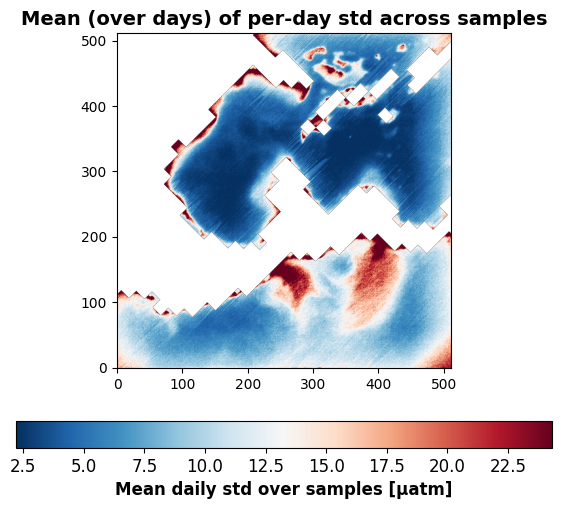

In [13]:
ny = 2**9
nx = 2**9
plot_surface_stat(df, grid_shape=(ny,nx), stat="std")

## SOCAT Test Set Plot

In [1]:
import pandas as pd
pred_columns = [f"mlp_{i}" for i in range(20)]
save_dir = "sota_anoms64/"
info_df = pd.read_parquet(f"../models/{save_dir}test_predictions.pq")

mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-l99hxvt6 because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


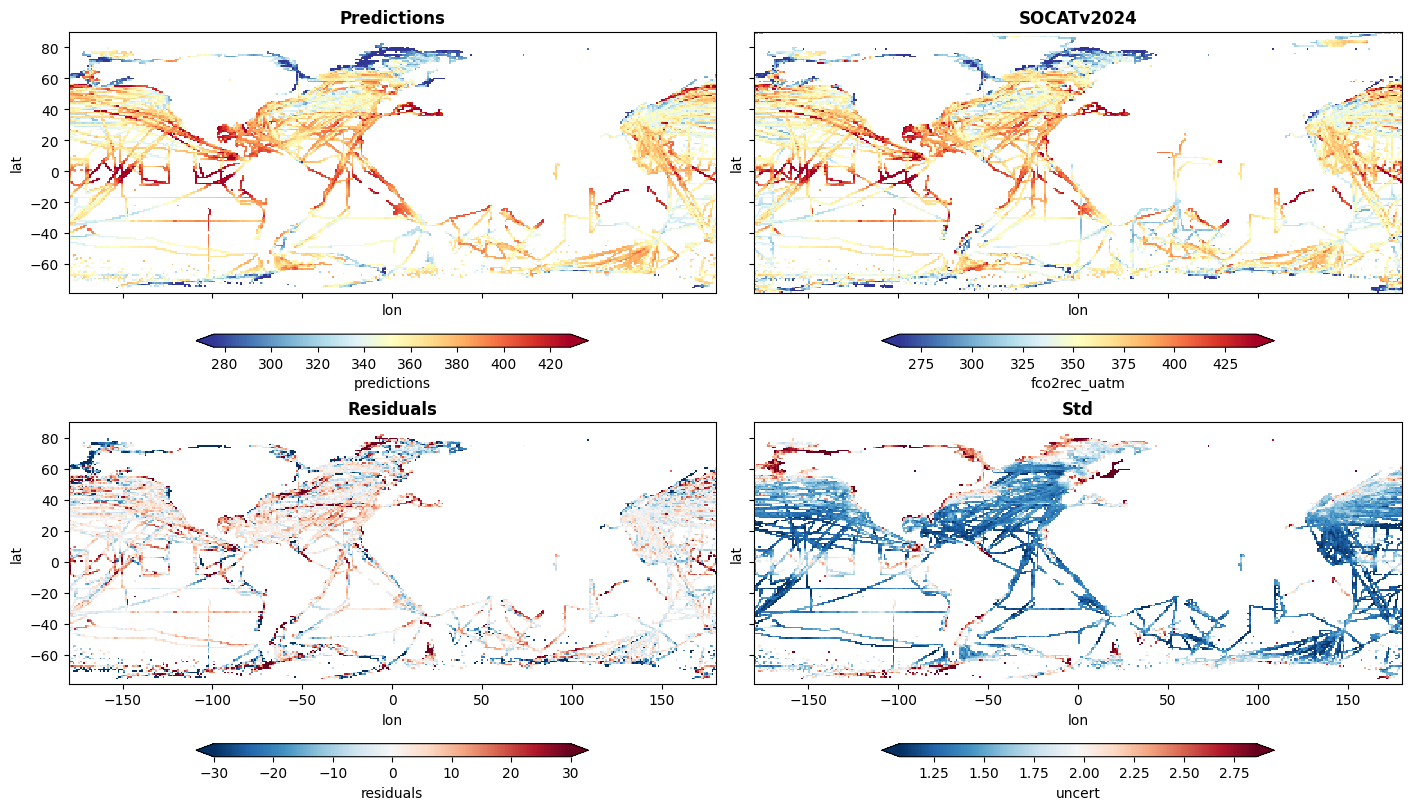

In [2]:
group_cols = ['lat', 'lon']
info_df['predictions'] = info_df.loc[:, pred_columns].mean(axis=1)
info_df['uncert'] = info_df.loc[:, pred_columns].std(axis=1)
info_df['residuals'] = info_df['fco2rec_uatm'] - info_df['predictions']
# round group_cols to int
info_df[group_cols] = (info_df[group_cols] * 20).round(0) / 20.0
info_cols =  ['predictions', 'fco2rec_uatm', 'residuals', 'uncert', 'seamask'] 
plotting_data = info_df.loc[:, group_cols + info_cols].groupby(group_cols).mean().to_xarray().coarsen(lat=20, lon=20, boundary='pad').mean()

import numpy as np
import matplotlib.pyplot as plt

# --- customise here ---
title_weight = "bold"     # e.g. "normal", "bold", or a numeric weight
cbar_kwargs = dict(
    orientation="horizontal",  # put colourbars below
    pad=0.06,                  # gap between image and colourbar
    fraction=0.05,             # thickness of the colourbar
    aspect=30,                 # length/thickness ratio
)
# ----------------------

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True, constrained_layout=True)

plotting_data.predictions.plot.imshow(
    robust=True, ax=axs[0, 0], cmap="RdYlBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[0, 0].set_title("Predictions", fontweight=title_weight)

plotting_data.fco2rec_uatm.plot.imshow(
    robust=True, ax=axs[0, 1], cmap="RdYlBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[0, 1].set_title("SOCATv2024", fontweight=title_weight)

plotting_data.residuals.plot.imshow(
    robust=True, ax=axs[1, 0], cmap="RdBu_r", vmin=-30, vmax=30, add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[1, 0].set_title("Residuals", fontweight=title_weight)

np.sqrt(plotting_data.uncert).plot.imshow(
    robust=True, ax=axs[1, 1], cmap="RdBu_r", add_colorbar=True, cbar_kwargs=cbar_kwargs
)
axs[1, 1].set_title("Std", fontweight=title_weight)

plt.show()


## Global HEALPix Inferences

In [1]:
import pandas as pd
import xarray as xr
import healpy as hp
import numpy as np
nside = 2**10
dm_cols = [f"sample_{i}" for i in range(20)]
mlp_cols = [f"mlp_{i}" for i in range(20)]
df = pd.read_parquet("../models/anoms_sea_1d/test.pq")
df2 = pd.read_parquet("../models/sota_anoms64_big/global.pq")
lon, lat = hp.pix2ang(nside, df.index.values, nest=True, lonlat=True)
df['lon'] = (lon + 180) % 360 - 180
df['lat'] = lat
df['time'] = pd.Timestamp("2022-10-04")
df.loc[df.seamask==0, dm_cols] = np.nan

# move mlp data to dm df
df['dm_mean'] = df[dm_cols].mean(axis=1) 
df['dm_std'] = df[dm_cols].std(axis=1) 
df['mlp_mean'] = df2[mlp_cols].mean(axis=1)
df['mlp_std'] = df2[mlp_cols].std(axis=1)
df['mlp_sample'] = df2[mlp_cols[0]]

sample_ds = df
sample_ds['lon'] = np.round(sample_ds['lon']*10, 0) / 10 #cast to 0.1 resoulution
sample_ds['lat'] = np.round(sample_ds['lat']*10, 0) / 10
sample_ds.set_index(['lon', 'lat', 'time'], inplace=True)
sample_ds = sample_ds.groupby(['lat', 'lon', 'time']).mean().to_xarray()

mkdir -p failed for path /home/jovyan/.cache/matplotlib: [Errno 13] Permission denied: '/home/jovyan/.cache/matplotlib'
Matplotlib created a temporary cache directory at /tmp/matplotlib-ursvho4f because there was an issue with the default path (/home/jovyan/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


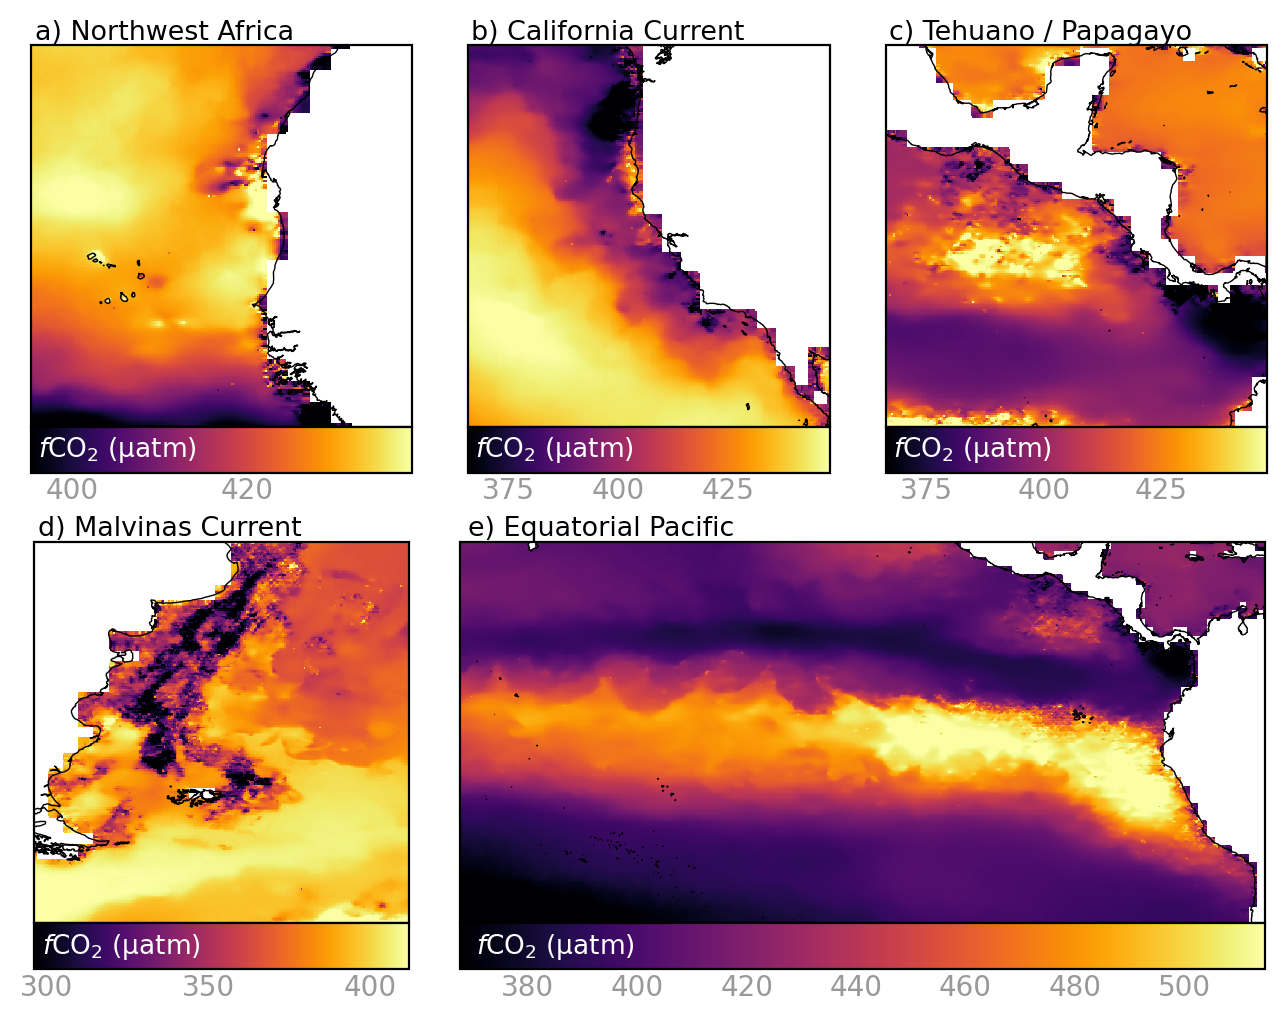

In [2]:
from infutils import plot_dfco2_regions
import matplotlib.pyplot as plt

plot_dfco2_regions(sample_ds.sample_0)
plt.show()


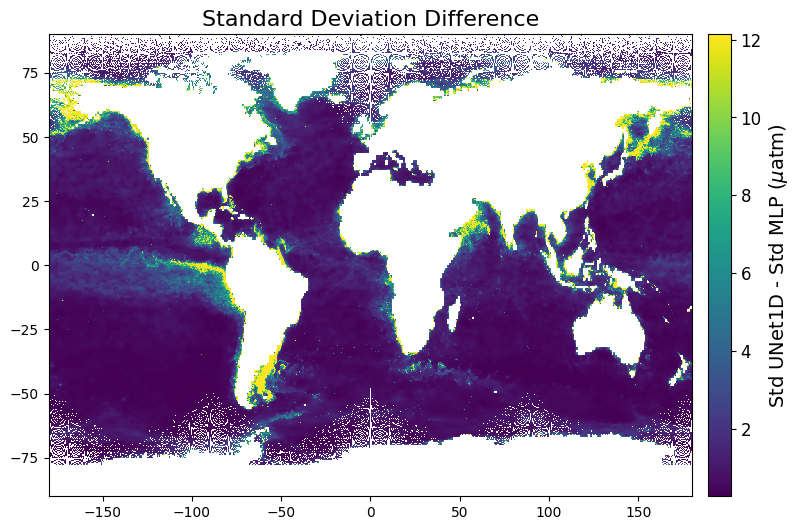

In [13]:
import matplotlib.pyplot as plt

# --- customise here ---
figsize = (10, 6)
title = "Standard Deviation Difference"
title_size = 16
cbar_label = r"Std UNet1D - Std MLP ($\mu$atm)"
cbar_label_size = 14
cbar_tick_size = 12
# ----------------------

fig, ax = plt.subplots(figsize=figsize)

# Let xarray draw the image but *not* the colourbar or default labels
mappable = (sample_ds.dm_std).plot(
    robust=True,
    ax=ax,
    add_colorbar=False,
    add_labels=False,
    cmap = "viridis"
)

# Title
ax.set_title(title, fontsize=title_size)

# Colourbar (beneath or beside as you prefer)
cbar = fig.colorbar(mappable, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label(cbar_label, fontsize=cbar_label_size)
cbar.ax.tick_params(labelsize=cbar_tick_size)

plt.show()
